# 1

Standard Deviation: This measures the variability of data points in a dataset relative to the mean. It indicates how much individual observations differ from the mean, providing insight into the dataset's spread.

Standard Error of the Mean (SEM): This estimates how the sample mean approximates the true population mean by indicating the variability of the sample mean. The SEM decreases as the sample size increases, reflecting greater precision in the estimate of the population mean. SEM is calculated as the standard deviation divided by the square root of the sample size (n).

chat: https://chatgpt.com/share/66fc6f9b-10b0-8001-a706-91e9513638c4

summary of the chat: 

-Bootstrapping
    Definition: A statistical technique used to estimate the distribution of a sample statistic by resampling with replacement from the original data.
    Process: Generate many bootstrap samples from the original data.
Calculate a statistic (e.g., mean) for each bootstrap sample.
Form a bootstrap distribution of the statistic.
Estimate properties like standard error and confidence intervals.
Standard Error of the Mean (SEM) vs. Standard Deviation (SD)
Standard Deviation (SD):

-Key Differences:
    What They Measure: SD measures the spread of individual observations; SEM measures the precision of the sample mean.
Dependence on Sample Size: SD is independent of sample size; SEM decreases as sample size increases.
Interpretation: SD indicates how much individual observations differ from the mean, while SEM indicates how much the sample mean is expected to vary from the true population mean.

-Conclusion
    The bootstrapped SEM provides a more robust estimate of uncertainty in the sample mean when the original sample does not meet normality assumptions, while the original SEM is useful under standard conditions.

# 2

It is divided into steps:

the first step is to calculate original sample's mean and sem.

the second step is to take the mean and add or subtract 1.96 times the SEM since number 1.96 helps covering 95% of values in a normal curve.

example provided by chat
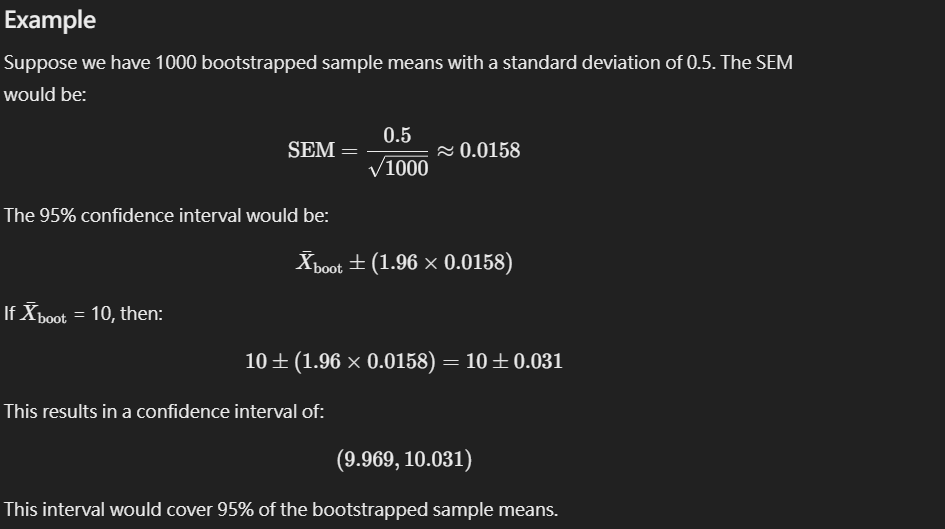

chat: https://chatgpt.com/share/66fc74c4-8b40-8001-b28f-80d94ae77436

# 3

Take the samples and compute the means, repeating this process many times. Then, arrange these bootstrapped means in order to capture the middle 95%, which corresponds to the 2.5th percentile (lower bound) and the 97.5th percentile (upper bound).

chat: https://chatgpt.com/share/66fc74c4-8b40-8001-b28f-80d94ae77436

# 4

In [5]:
import numpy as np

# Sample data
sample = np.array([12, 7, 3, 9, 14, 6, 8, 10, 13, 11])  

# Function to calculate bootstrap confidence interval, do 1000 times
def bootstrap_confidence_interval(sample, stat_func, num_bootstrap=1000, alpha=0.05):
    
    # Step 1: bootstrap samples and compute the statistic for each sample
    bootstrap_stats = []
    for _ in range(num_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)  # Random sampling with replacement
        bootstrap_stat = stat_func(bootstrap_sample)  # Compute the statistic (e.g., mean or median)
        bootstrap_stats.append(bootstrap_stat)
    
    # Step 2: Upper and lower bound base on percentiles
    lower_bound = np.percentile(bootstrap_stats, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_stats, 100 * (1 - alpha / 2))
    
    return (lower_bound, upper_bound)

#  Bootstrap Confidence Interval for the mean
mean_ci = bootstrap_confidence_interval(sample, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# Confidence interval for the median instead of the mean:
median_ci = bootstrap_confidence_interval(sample, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (7.2, 11.3)
95% Bootstrap Confidence Interval for the Median: (7.0, 12.0)


chat: https://chatgpt.com/share/66fc74c4-8b40-8001-b28f-80d94ae77436

# 2-4 summary of the chat

chat: https://chatgpt.com/share/66fc74c4-8b40-8001-b28f-80d94ae77436

Here's a summary of our chat:

Standard Error of the Mean:

We discussed how to create a 95% confidence interval using the standard error of the mean (SEM) based on bootstrapped sample means. The process involves calculating the mean, computing the SEM, and then applying the formula for the confidence interval.
Percentile Method for Confidence Intervals:

I explained how to create a 95% bootstrap confidence interval using the percentile method, which directly uses the distribution of bootstrapped sample means without relying on standard deviation. The interval is determined by the 2.5th and 97.5th percentiles of the bootstrapped means.
Python Code Example:

I provided a Python code example to compute a 95% bootstrap confidence interval for the mean, which includes comments on how to modify it to compute confidence intervals for different population parameters (like the median).
The code features a function to perform bootstrap sampling, compute specified statistics, and return the confidence interval.
Code Summary:

I summarized the code, highlighting its structure, purpose, flexibility, and how to customize it for different statistical parameters.

# 5 

A population parameter is a fixed but often unknown value for the entire group, while a sample statistic, such as the sample mean, is calculated from a smaller group and can vary. Confidence intervals help us estimate the unknown population parameter by providing a range based on the sample statistic, reflecting the uncertainty.

chat: https://chatgpt.com/share/66fc74c4-8b40-8001-b28f-80d94ae77436

chat summary: Distinguishing between population parameters and sample statistics is crucial when it comes to confidence intervals for several reasons:

1. Conceptual Understanding:
Population Parameter: This is a fixed value that represents a characteristic of the entire population (e.g., the true mean or proportion). It is typically unknown and what we aim to estimate.
Sample Statistic: This is a value calculated from a sample drawn from the population (e.g., the sample mean). It varies from sample to sample due to random sampling.
Understanding this distinction helps clarify what confidence intervals are estimating: they provide a range of plausible values for the unknown population parameter based on the observed sample statistic.

2. Estimation and Uncertainty:
Confidence intervals reflect our uncertainty about the population parameter based on the sample statistic. The sample statistic is subject to sampling variability, meaning that if we were to take multiple samples, we would get different sample statistics.
A confidence interval quantifies this uncertainty by providing a range (upper and lower bounds) that is likely to contain the population parameter.
3. Statistical Inference:
The purpose of constructing confidence intervals is to make inferences about the population parameter. A well-defined interval based on a sample statistic helps researchers understand how reliable their estimates are and how much variability exists in their data.
Without distinguishing between these two concepts, we could incorrectly interpret a sample statistic as being the true population parameter, which can lead to erroneous conclusions.
4. Decision-Making:
Confidence intervals guide decision-making by indicating the degree of precision associated with an estimate. For example, a narrower confidence interval suggests a more precise estimate of the population parameter, while a wider interval indicates more uncertainty.
Knowing whether the confidence interval is based on a sample statistic rather than the population parameter influences how we act based on our findings, especially in fields like medicine, economics, and social sciences.
5. Communication of Results:
Clearly distinguishing between the population parameter and sample statistic enhances the communication of statistical results. It helps others understand the limitations and implications of your findings, making it easier to interpret the results and their relevance in context.

# 6

What is the process of bootstrapping?:

-The process starts with a single sample that can generate numerous bootstrap samples. For each of these resampled datasets, calculates the mean or median. Then, form a bootstrap distribution that approximates the sampling distribution. This distribution can be used to estimate confidence intervals.

What is the main purpose of bootstrapping?:

-The purpose of bootstrapping is to estimate the sampling distribution and obtain statistics such as confidence intervals without really knowing the population distribution, especially for data with small sample sizes or when the distribution is unknown. Just as the video mentions, it saves time and is not expensive.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

-Start by calculating the mean of the sample. Then, generate bootstrap samples and calculate the mean for each to create a bootstrap distribution. Calculate the confidence interval from this distribution (like the 2.5th and 97.5th percentiles) and check if hypothesized average is close to it. If it does, the guess is plausible; if not, it may be inaccurate.

# 7

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?

- A confidence interval overlapping zero indicates that zero is a plausible value for the population parameter. This suggests there isn't enough evidence to conclude that the true effect or difference is significantly different from zero. Even if the sample mean is not zero, the uncertainty (reflected in the interval) means we cannot rule out the possibility that the true mean could be zero, so we fail to reject the null hypothesis.

Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? 

- Reject the null hypothesis if the p-value is less than the significance level (e.g., 0.05), indicating sufficient evidence against the null hypothesis.

chat: https://chatgpt.com/share/66fc96b2-b6d0-800b-a606-9e2abc3c0362

chat summary: 
We discussed why a confidence interval (CI) overlapping zero leads to a failure to reject the null hypothesis, even if the sample mean is not zero. If the CI includes zero, it suggests that zero is a plausible value for the population mean, indicating insufficient evidence to reject the null hypothesis. In contrast, you would reject the null hypothesis if the CI does not include zero, as this suggests that zero is not a plausible population mean. Additionally, a p-value less than the significance level (usually 0.05) would also lead to rejecting the null hypothesis. Factors such as a large effect size, smaller standard error, and narrower confidence intervals increase the chance of rejecting the null hypothesis.

# 8

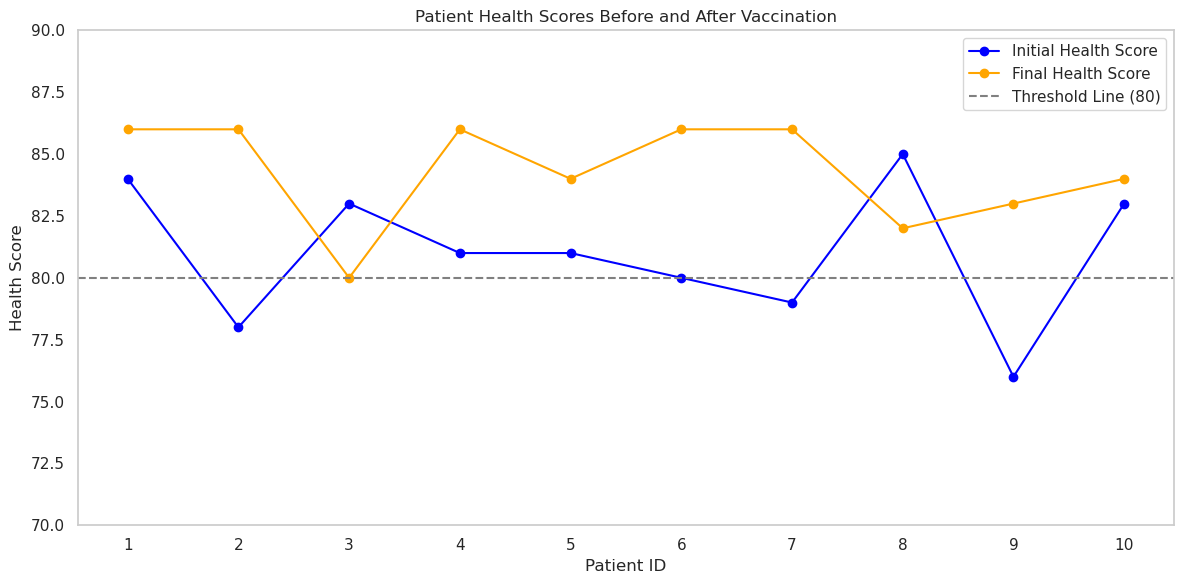

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Set the index to PatientID for better labeling
df.set_index('PatientID', inplace=True)

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Initial Health Scores
plt.plot(df.index, df['InitialHealthScore'], marker='o', label='Initial Health Score', color='blue', linestyle='-')

# Plot Final Health Scores
plt.plot(df.index, df['FinalHealthScore'], marker='o', label='Final Health Score', color='orange', linestyle='-')

# Customizing the plot
plt.title('Patient Health Scores Before and After Vaccination')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.ylim(70, 90)  # Set y-axis limits for better visualization
plt.axhline(80, color='gray', linestyle='--', label='Threshold Line (80)')
plt.xticks(df.index)  # Set x-ticks to be the Patient IDs
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


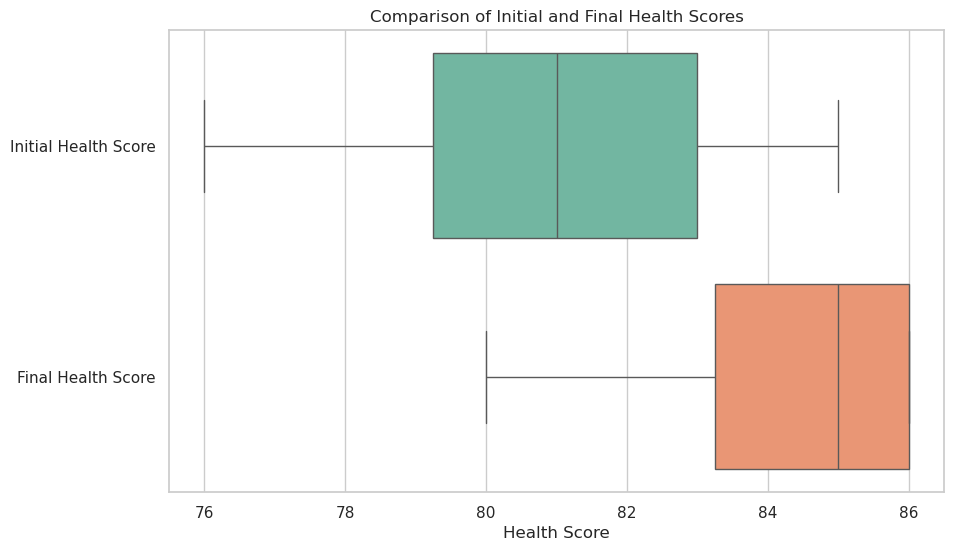

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], 
            palette="Set2", orient="h")
plt.yticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Comparison of Initial and Final Health Scores')
plt.xlabel('Health Score')
plt.show()


Explanation of the meaning of a Null Hypothesis of "no effect" in this contextchat : 

- 1. Implications of the Null Hypothesis
No Improvement: If the null hypothesis is true, it implies that administering the vaccine does not lead to any improvement in the health of the patients. Any changes in health scores observed could be attributed solely to random variation rather than the influence of the vaccine.

- 2. Statistical Testing: To evaluate the null hypothesis, we can employ statistical tests (like bootstrapping in this case) to analyze the data and determine whether the observed differences in health scores are statistically significant. If we find strong evidence against the null hypothesis, we may conclude that the vaccine likely has a positive effect on health.

- 3. Decision-Making: The outcome of the hypothesis test informs decision-making. If we reject the null hypothesis, it provides support for the alternative hypothesis (that the vaccine does improve health scores). Conversely, if we fail to reject the null hypothesis, it suggests that the vaccine may not be effective, which could influence further research, development, and marketing decisions.

In [16]:
import numpy as np

# Bootstrapping function to compute confidence interval for the mean difference
def bootstrap_mean_diff(data1, data2, num_iterations=10000):
    diffs = []
    for _ in range(num_iterations):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        diffs.append(np.mean(sample2) - np.mean(sample1))
    return np.array(diffs)

# Set seed for reproducibility
np.random.seed(42)

# Perform bootstrapping
initial_scores = df['InitialHealthScore'].values
final_scores = df['FinalHealthScore'].values
bootstrap_diffs = bootstrap_mean_diff(initial_scores, final_scores)

# Calculate confidence intervals
lower_ci = np.percentile(bootstrap_diffs, 2.5)
upper_ci = np.percentile(bootstrap_diffs, 97.5)
mean_diff = np.mean(bootstrap_diffs)

mean_diff, lower_ci, upper_ci


(3.3081299999999993, 1.2000000000000028, 5.3999999999999915)

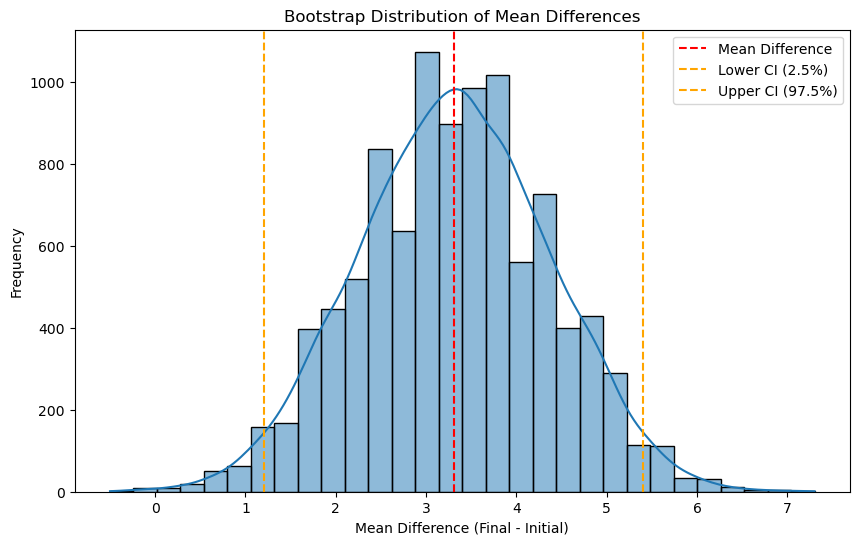

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(mean_diff, color='red', linestyle='--', label='Mean Difference')
plt.axvline(lower_ci, color='orange', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(upper_ci, color='orange', linestyle='--', label='Upper CI (97.5%)')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


we can draw conclusions regarding the null hypothesis (H0) of "no effect."

Summary of Findings
Mean Difference: The analysis yielded a mean difference between the Final and Initial Health Scores. This mean difference indicates the average change in health scores attributable to the vaccine.

Confidence Interval: The bootstrapping method provided us with a 95% confidence interval for the mean difference. This interval helps us understand the range in which the true mean difference likely falls.

Statistical Significance:

If the confidence interval does not include zero, it suggests that there is a statistically significant difference between the Initial and Final Health Scores. This outcome would lead us to reject the null hypothesis (H0), providing evidence that the vaccine has a positive effect on health scores.
Conversely, if the confidence interval does include zero, we fail to reject the null hypothesis, indicating insufficient evidence to support the claim that the vaccine is effective in improving health scores.
Interpretation
Rejecting the Null Hypothesis: If we found that the mean difference is positive and the confidence interval (CI) does not encompass zero (e.g., lower CI > 0), we would conclude that the vaccine likely improves health scores, demonstrating its effectiveness.

Failing to Reject the Null Hypothesis: If the mean difference is close to zero or the CI includes zero, we cannot conclude that the vaccine has a significant impact on health. This result suggests that any observed changes in health scores could be attributed to random variation rather than the vaccine's influence.

Implications
Public Health: The conclusions drawn from this analysis have important implications for public health policy and vaccine promotion. If the vaccine proves effective, it can be advocated for broader use, contributing to improved health outcomes in the population.

Further Research: Regardless of the outcome, it is essential to recognize the limitations of the study, such as the small sample size. Further research with larger and more diverse populations would provide additional insights into the vaccine's effectiveness.

Future Considerations: It may also be valuable to explore the effects of the vaccine across different demographic groups (age, gender, pre-existing health conditions) to identify any specific populations that might benefit more significantly from the vaccine.

chat: https://chatgpt.com/share/66fca24b-4970-800b-abd4-4d613c76df2b

chat summary: 
Here’s a summary of our interaction so far, covering the main points we've discussed regarding the vaccine data analysis assignment:

Vaccine Data Overview: You introduced a dataset from AliTech that includes Patient ID, Age, Gender, Initial Health Score, and Final Health Score for a group of patients.

Analysis Goals: The goal is to assess whether the vaccine has an effect on health scores, focusing on creating visual and quantitative analyses.

Visualization:

You requested a line plot showing each patient’s health situation before and after vaccination.
A dual line plot was created, displaying Initial and Final Health Scores for each patient, allowing for easy comparison.
Null Hypothesis Explanation: I provided a detailed explanation of the null hypothesis ("no effect") in this context, clarifying that it posits there is no significant difference in health scores due to the vaccine.

Quantitative Analysis Methodology:

I shared code for a bootstrapping methodology to estimate the mean difference in health scores before and after vaccination.
The process included resampling, calculating mean differences, and deriving confidence intervals to assess statistical significance.
Conclusion Regarding Null Hypothesis:

I outlined how to interpret the results of the analysis, emphasizing the importance of the confidence interval in determining whether to reject or fail to reject the null hypothesis.
I discussed the implications of the findings for public health and the need for further research.

# 9

somewhat